# Imports 

In [19]:
import seaborn as sns 

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import nltk
import ast
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)

In [20]:
df = pd.read_csv('datasets/analysis.csv')

In [21]:
# no nul' values 
df.isna().sum()

title               0
split_comments      0
reordered_scores    0
reordered_labels    0
sentiment           0
dtype: int64

In [22]:
df['reordered_scores'] = df['reordered_scores'].apply((lambda x: ast.literal_eval(x)))

# Rank Data by fears frustrations aspirations

In [23]:
fears = df.sort_values(by='reordered_scores', key=lambda x: x.apply(lambda y: y[0]), ascending=False)
frustrations = df.sort_values(by='reordered_scores', key=lambda x: x.apply(lambda y: y[1]), ascending=False)
aspirations = df.sort_values(by='reordered_scores', key=lambda x: x.apply(lambda y: y[2]), ascending=False)


# Analysis 

In [24]:
# Preprocess the text
def preprocess_text(text):
    text = re.sub(r'\W', ' ', str(text))
    text = text.lower()
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    text = re.sub(r'^b\s+', '', text)
    return text

In [25]:
df['processed_comments'] = df['split_comments'].apply(preprocess_text)

In [42]:
fears = df.sort_values(by='reordered_scores', key=lambda x: x.apply(lambda y: y[0]), ascending=False)
frustrations = df.sort_values(by='reordered_scores', key=lambda x: x.apply(lambda y: y[1]), ascending=False)
aspirations = df.sort_values(by='reordered_scores', key=lambda x: x.apply(lambda y: y[2]), ascending=False)

In [43]:
df['sentiment'].value_counts()

sentiment
positive    7444
neutral     4948
negative    2534
Name: count, dtype: int64

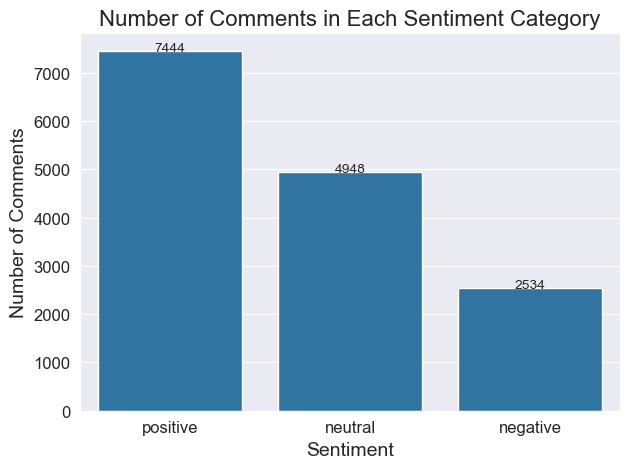

In [44]:

# Create a color palette for the bars
colors = sns.color_palette("pastel")
sns.set_style("darkgrid")
sns.barplot(x=df['sentiment'].value_counts().index, y=df['sentiment'].value_counts().values)
# Add the number of comments on top of each bar
for index, value in enumerate(df['sentiment'].value_counts().values):
    plt.text(index, value, str(value), ha='center')



# Set labels and title with increased font size
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Number of Comments', fontsize=14)
plt.title('Number of Comments in Each Sentiment Category', fontsize=16)

# Increase the size of the ticks on both axes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


# Analyse Fears

In [40]:
# sort by fears 

# Analyse Frustrations 

# Analyse Aspirations 

In [45]:
aspirations.head(25)

,title,split_comments,reordered_scores,reordered_labels,sentiment,processed_comments
5602,How I Manage My Time - 10 Time Management Tips,"drinking orange juice out of a fancy glass at home, that’s some goals right there.","[0.0010489796986803412, 0.0013131831074133515, 0.9976378083229065]","['fears', 'frustrations', 'aspirations']",positive,drinking orange juice out of fancy glass at home that some goals right there
11272,7 Actionable Ways to Achieve More in Life,you're my inspiration,"[0.002028948161751032, 0.001852899556979537, 0.9961181282997131]","['fears', 'frustrations', 'aspirations']",positive,you re my inspiration
14841,5 Small Changes to Supercharge Your Focus,thomas frank is an inspiration,"[0.0027784034609794617, 0.002567431889474392, 0.9946541786193848]","['fears', 'frustrations', 'aspirations']",positive,thomas frank is an inspiration
5623,How I Manage My Time - 10 Time Management Tips,"i love this guy, the reason i started my dreams now.","[0.0028450298123061657, 0.002766459947451949, 0.9943884611129761]","['fears', 'frustrations', 'aspirations']",positive,i love this guy the reason started my dreams now
11456,How to Be Effortlessly Disciplined: 5 Mindset Shifts,hopeful :smiling_face_with_smiling_eyes:,"[0.0033352358732372522, 0.002360517391934991, 0.9943041801452637]","['fears', 'frustrations', 'aspirations']",positive,hopeful smiling_face_with_smiling_eyes
1259,5 Essential Tips for Long-Lasting Productivity,it's inspiring!,"[0.002528827404603362, 0.0036696013994514942, 0.9938015937805176]","['fears', 'frustrations', 'aspirations']",positive,it inspiring
12275,How to Make 2024 The Best Year of Your Life,inspiring :red_heart:,"[0.0030877478420734406, 0.0032842152286320925, 0.9936280846595764]","['fears', 'frustrations', 'aspirations']",positive,inspiring red_heart
9773,The Most PRODUCTIVE Desk Setups on YouTube | 2021,the dream collab,"[0.0033706703688949347, 0.0030914675444364548, 0.9935378432273865]","['fears', 'frustrations', 'aspirations']",neutral,the dream collab
12488,How to Make 2024 The Best Year of Your Life,you are the inspiration …,"[0.0031970341224223375, 0.0035403170622885227, 0.9932626485824585]","['fears', 'frustrations', 'aspirations']",positive,you are the inspiration
5178,How I Manage My Time - 10 Time Management Tips,anyone else saw “call w/ gymshark” ? his dream of becoming a gymshark athlete is coming through finally,"[0.0031701666302978992, 0.00360281765460968, 0.9932270646095276]","['fears', 'frustrations', 'aspirations']",positive,anyone else saw call gymshark his dream of becoming gymshark athlete is coming through finally


# Video ideas 

In [26]:
df[df['split_comments'].str.contains('video idea',case=False, na=False)].head(15)

,title,split_comments,reordered_scores,reordered_labels,sentiment
747,How to Build Your Ultimate Productivity System,next video idea: how to make breathing productive.,"[0.07707909494638443, 0.11758062988519669, 0.8053402900695801]","['fears', 'frustrations', 'aspirations']",neutral
2229,5 Essential Tips for Long-Lasting Productivity,"@ali abdaal here is a video idea for you - why you should or shouldn't do medical in your college? [given the fact you love math and bio, and biomedical engineering is underrated]","[0.13188423216342926, 0.08569978922605515, 0.7824159860610962]","['fears', 'frustrations', 'aspirations']",positive
3022,"How I Organize My Life - The ""LAZI"" Productivity System","it’s amazing how you come up with so many video ideas, great job ali!","[0.2424195110797882, 0.1261259913444519, 0.6314544677734375]","['fears', 'frustrations', 'aspirations']",positive
3243,My Complete Productivity System,"video idea: what to eat to be more productive? or how can i plan regular eating during my day. of course you can eat while working to be more ""productive"", but i'd like to focus more on nutrition and so :dsorry for my bad english","[0.2333422303199768, 0.1894235759973526, 0.5772342085838318]","['fears', 'frustrations', 'aspirations']",neutral
5146,How I Manage My Time - 10 Time Management Tips,ali's next video idea: productively praying in ramadan,"[0.13499313592910767, 0.10884632915258408, 0.75616055727005]","['fears', 'frustrations', 'aspirations']",neutral
5150,How I Manage My Time - 10 Time Management Tips,"woah ali, just returned from your previous video about time management and i really appreciate your effort of upping the game even you already have same content at hands. and also your actual time distribution in the day or week could be interesting video idea. because myself, a viewer, still can not wrap one's head around how you can absorb/reflex/produce knowledge (read books and blogs on medicine and productivity/tutorials, watch documentaries,...) with many projects (youtube, podcast, courses, website, guitar,... or acts of making plans itself) while handling social interaction (social medias, friends and family, presumably romance too?) in a day or a week of selective amount of hours. oh yeah, with saving lives on the other end of the plate too. that is such incredible!","[0.24213539063930511, 0.26740193367004395, 0.49046263098716736]","['fears', 'frustrations', 'aspirations']",positive
8456,How to Organise your Life - Building a Second Brain,"really loved your take on working on more video projects at a time and make them ""mature"" in a more natural way. i would love to learn more about your video creation process so, because you asked about new video ideas, what about doing a run over your video production process, including some gear recommendations? thanks for your teachings and all the videos :)","[0.173550084233284, 0.10079590976238251, 0.7256540060043335]","['fears', 'frustrations', 'aspirations']",positive
8488,How to Organise your Life - Building a Second Brain,video ideas: :sparkles:- steps to plan effectively- how to balance school and personal lifestyle- how to enter flow state- how to avoid being burnout - how to retain information permanently- how to ask a proper questions,"[0.09270860254764557, 0.08571840077638626, 0.8215729594230652]","['fears', 'frustrations', 'aspirations']",neutral
8519,How to Organise your Life - Building a Second Brain,"i wrote to myself ,,dont forget to suggest a video idea so you can win 100$''but i have 10 ideas:make a video about:1. energy cycles2. sleep cycles3. parkinson's law 4. kidlin's law 5. gilbert's law 6. wilson's law ( please maie a video about it!)7. ways to make money as a student8. how to create strong habits (i think you have a video on this, but i want something more detailed) 9 my professional history (jobs you had in the past, from start to now, and your future plans)10. my investing principlesi hope i win at least 100$ :rolling_on_the_floor_laugh

In [48]:
group_title = df.groupby(['title'])

In [49]:
group_title

In [57]:
video_analysis = group_title['reordered_labels'].value_counts().unstack()

In [58]:
video_analysis

reordered_labels,"['fears', 'frustrations', 'aspirations']"
title,
12 Productivity Myths Wasting Your Time,313
5 Essential Tips for Long-Lasting Productivity,1367
5 Small Changes to Supercharge Your Focus,164
7 Actionable Ways to Achieve More in Life,417
How I Manage My Time - 10 Time Management Tips,1870
"How I Organize My Life - The ""LAZI"" Productivity System",708
How to Be Effortlessly Disciplined: 5 Mindset Shifts,447
How to Beat Procrastination,1195
How to Build Your Ultimate Productivity System,992
